# Explorative Datenanalyse

Dieses Notebook führt eine explorative Datenanalyse der Rohdaten durch.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Einstellungen für bessere Visualisierungen
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [36]:
# Daten laden
edges_pre_req = pd.read_csv('../data/edges_pre_req.csv')
edges_same_group = pd.read_csv('../data/edges_same_group.csv')
edges_same_semester = pd.read_csv('../data/edges_same_semester.csv')
nodes = pd.read_csv('../data/nodes.csv')

print("=" * 60)
print("DATEN ÜBERSICHT")
print("=" * 60)
print(f"\nNodes-Datensatz: {len(nodes)} Zeilen, {len(nodes.columns)} Spalten")
print(f"Edges Pre-Req (Voraussetzungen): {len(edges_pre_req)} Zeilen, {len(edges_pre_req.columns)} Spalten")
print(f"Edges Same Group (Gleiche Gruppe): {len(edges_same_group)} Zeilen, {len(edges_same_group.columns)} Spalten")
print(f"Edges Same Semester (Gleiches Semester): {len(edges_same_semester)} Zeilen, {len(edges_same_semester.columns)} Spalten")
print(f"\nSpalten in nodes: {list(nodes.columns)}")
print(f"Spalten in edges_pre_req: {list(edges_pre_req.columns)}")
print(f"Spalten in edges_same_group: {list(edges_same_group.columns)}")
print(f"Spalten in edges_same_semester: {list(edges_same_semester.columns)}")


DATEN ÜBERSICHT

Nodes-Datensatz: 87 Zeilen, 5 Spalten
Edges Pre-Req (Voraussetzungen): 10 Zeilen, 4 Spalten
Edges Same Group (Gleiche Gruppe): 544 Zeilen, 4 Spalten
Edges Same Semester (Gleiches Semester): 768 Zeilen, 4 Spalten

Spalten in nodes: ['Id', 'Label', 'Name', 'Gruppe', 'Semester']
Spalten in edges_pre_req: ['Source', 'Target', 'Type', 'Label']
Spalten in edges_same_group: ['Source', 'Target', 'Type', 'Label']
Spalten in edges_same_semester: ['Source', 'Target', 'Type', 'Label']


## 1. Datenqualität und Vollständigkeit


In [37]:
# Fehlende Werte analysieren
print("=" * 60)
print("FEHLENDE WERTE - NODES")
print("=" * 60)
missing_nodes = nodes.isnull().sum()
missing_pct = (missing_nodes / len(nodes) * 100).round(2)
missing_df = pd.DataFrame({
    'Fehlend': missing_nodes,
    'Prozent': missing_pct
})
print(missing_df[missing_df['Fehlend'] > 0])

print("\n" + "=" * 60)
print("FEHLENDE WERTE - EDGES PRE-REQ (Voraussetzungen)")
print("=" * 60)
missing_pre_req = edges_pre_req.isnull().sum()
missing_pct_pre_req = (missing_pre_req / len(edges_pre_req) * 100).round(2)
missing_df_pre_req = pd.DataFrame({
    'Fehlend': missing_pre_req,
    'Prozent': missing_pct_pre_req
})
print(missing_df_pre_req[missing_df_pre_req['Fehlend'] > 0])

print("\n" + "=" * 60)
print("FEHLENDE WERTE - EDGES SAME GROUP (Gleiche Gruppe)")
print("=" * 60)
missing_same_group = edges_same_group.isnull().sum()
missing_pct_same_group = (missing_same_group / len(edges_same_group) * 100).round(2)
missing_df_same_group = pd.DataFrame({
    'Fehlend': missing_same_group,
    'Prozent': missing_pct_same_group
})
print(missing_df_same_group[missing_df_same_group['Fehlend'] > 0])

print("\n" + "=" * 60)
print("FEHLENDE WERTE - EDGES SAME SEMESTER (Gleiches Semester)")
print("=" * 60)
missing_same_semester = edges_same_semester.isnull().sum()
missing_pct_same_semester = (missing_same_semester / len(edges_same_semester) * 100).round(2)
missing_df_same_semester = pd.DataFrame({
    'Fehlend': missing_same_semester,
    'Prozent': missing_pct_same_semester
})
print(missing_df_same_semester[missing_df_same_semester['Fehlend'] > 0])


FEHLENDE WERTE - NODES
Empty DataFrame
Columns: [Fehlend, Prozent]
Index: []

FEHLENDE WERTE - EDGES PRE-REQ (Voraussetzungen)
Empty DataFrame
Columns: [Fehlend, Prozent]
Index: []

FEHLENDE WERTE - EDGES SAME GROUP (Gleiche Gruppe)
Empty DataFrame
Columns: [Fehlend, Prozent]
Index: []

FEHLENDE WERTE - EDGES SAME SEMESTER (Gleiches Semester)
Empty DataFrame
Columns: [Fehlend, Prozent]
Index: []


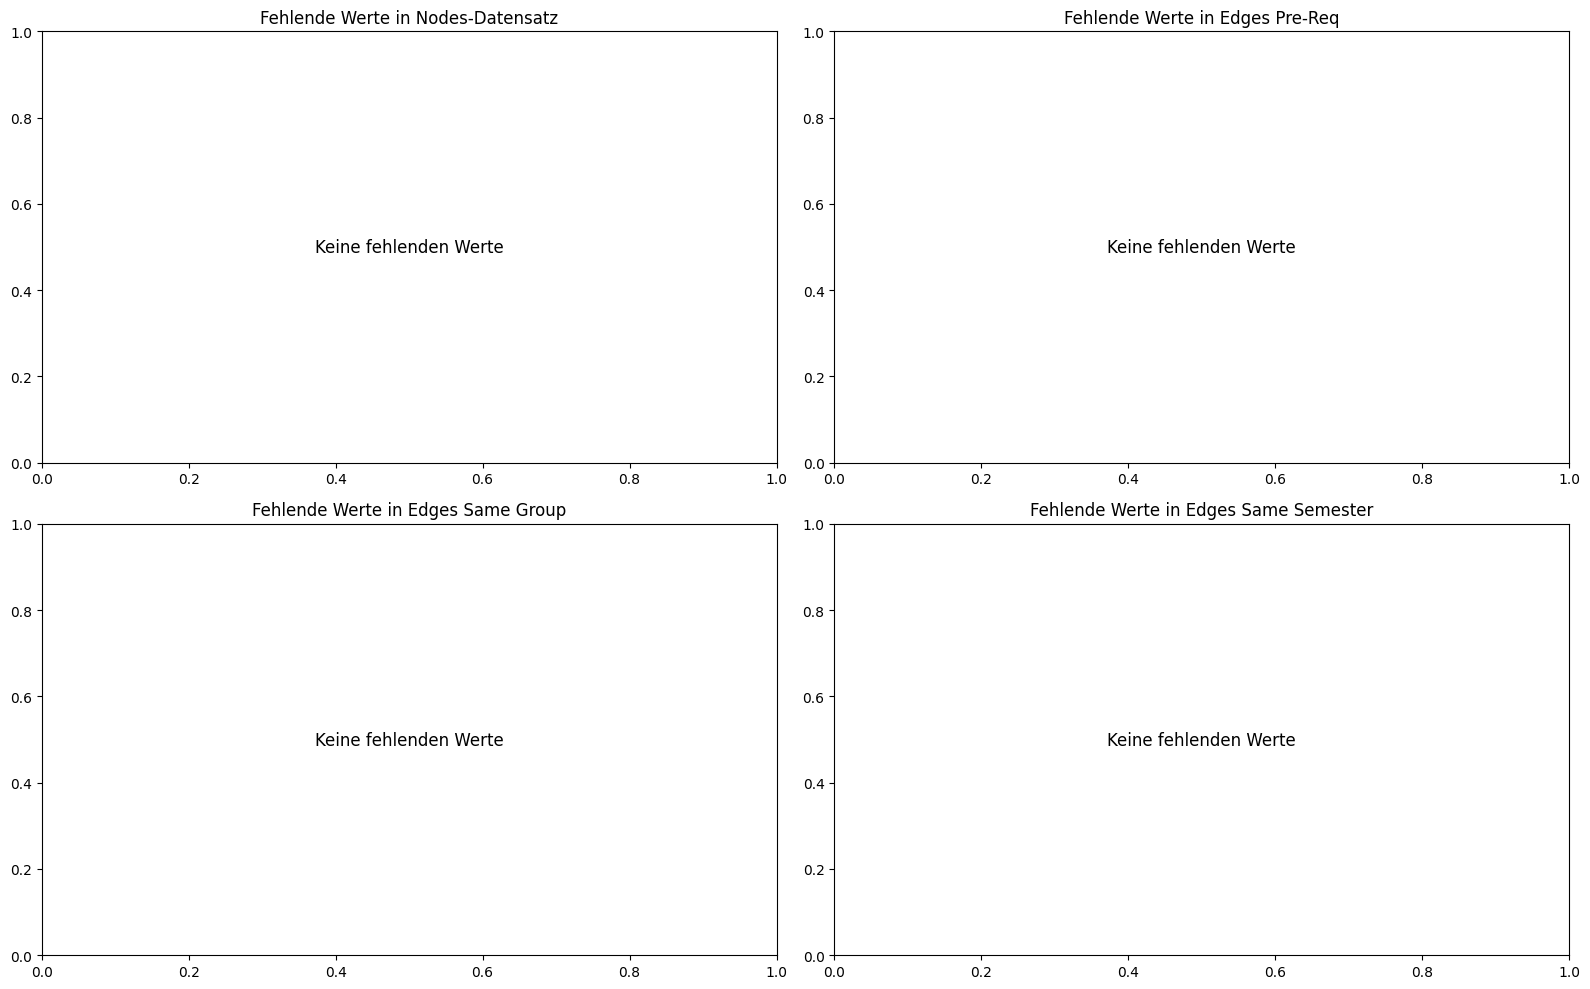

In [38]:
# Visualisierung fehlender Werte
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Nodes
ax = axes[0, 0]
missing_nodes_plot = nodes.isnull().sum()
missing_nodes_plot = missing_nodes_plot[missing_nodes_plot > 0]
if len(missing_nodes_plot) > 0:
    missing_nodes_plot.plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Anzahl fehlender Werte')
    ax.set_title('Fehlende Werte in Nodes-Datensatz')
    ax.grid(True, alpha=0.3, axis='x')
else:
    ax.text(0.5, 0.5, 'Keine fehlenden Werte', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.set_title('Fehlende Werte in Nodes-Datensatz')

# Edges Pre-Req
ax = axes[0, 1]
missing_pre_req_plot = edges_pre_req.isnull().sum()
missing_pre_req_plot = missing_pre_req_plot[missing_pre_req_plot > 0]
if len(missing_pre_req_plot) > 0:
    missing_pre_req_plot.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Anzahl fehlender Werte')
    ax.set_title('Fehlende Werte in Edges Pre-Req')
    ax.grid(True, alpha=0.3, axis='x')
else:
    ax.text(0.5, 0.5, 'Keine fehlenden Werte', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.set_title('Fehlende Werte in Edges Pre-Req')

# Edges Same Group
ax = axes[1, 0]
missing_same_group_plot = edges_same_group.isnull().sum()
missing_same_group_plot = missing_same_group_plot[missing_same_group_plot > 0]
if len(missing_same_group_plot) > 0:
    missing_same_group_plot.plot(kind='barh', ax=ax, color='green')
    ax.set_xlabel('Anzahl fehlender Werte')
    ax.set_title('Fehlende Werte in Edges Same Group')
    ax.grid(True, alpha=0.3, axis='x')
else:
    ax.text(0.5, 0.5, 'Keine fehlenden Werte', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.set_title('Fehlende Werte in Edges Same Group')

# Edges Same Semester
ax = axes[1, 1]
missing_same_semester_plot = edges_same_semester.isnull().sum()
missing_same_semester_plot = missing_same_semester_plot[missing_same_semester_plot > 0]
if len(missing_same_semester_plot) > 0:
    missing_same_semester_plot.plot(kind='barh', ax=ax, color='orange')
    ax.set_xlabel('Anzahl fehlender Werte')
    ax.set_title('Fehlende Werte in Edges Same Semester')
    ax.grid(True, alpha=0.3, axis='x')
else:
    ax.text(0.5, 0.5, 'Keine fehlenden Werte', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.set_title('Fehlende Werte in Edges Same Semester')

plt.tight_layout()
plt.show()


### Interpretation der fehlenden Werte

Es sind keine fehlenden Werte vorhanden.

In [39]:
# Duplikate prüfen
print("=" * 60)
print("DUPLIKATE PRÜFUNG")
print("=" * 60)
print(f"Duplikate in nodes (nach Id): {nodes.duplicated(subset=['Id']).sum()}")
print(f"Duplikate in nodes (alle Spalten): {nodes.duplicated().sum()}")

print(f"\nDuplikate in edges_pre_req (alle Spalten): {edges_pre_req.duplicated().sum()}")
print(f"Duplikate in edges_pre_req (Source-Target Paare): {edges_pre_req.duplicated(subset=['Source', 'Target']).sum()}")

print(f"\nDuplikate in edges_same_group (alle Spalten): {edges_same_group.duplicated().sum()}")
print(f"Duplikate in edges_same_group (Source-Target Paare): {edges_same_group.duplicated(subset=['Source', 'Target']).sum()}")

print(f"\nDuplikate in edges_same_semester (alle Spalten): {edges_same_semester.duplicated().sum()}")
print(f"Duplikate in edges_same_semester (Source-Target Paare): {edges_same_semester.duplicated(subset=['Source', 'Target']).sum()}")

# Erste Zeilen anzeigen
print("\n" + "=" * 60)
print("ERSTE ZEILEN - NODES")
print("=" * 60)
print(nodes.head(10))

print("\n" + "=" * 60)
print("ERSTE ZEILEN - EDGES PRE-REQ (Voraussetzungen)")
print("=" * 60)
print(edges_pre_req.head())

print("\n" + "=" * 60)
print("ERSTE ZEILEN - EDGES SAME GROUP (Gleiche Gruppe)")
print("=" * 60)
print(edges_same_group.head())

print("\n" + "=" * 60)
print("ERSTE ZEILEN - EDGES SAME SEMESTER (Gleiches Semester)")
print("=" * 60)
print(edges_same_semester.head())


DUPLIKATE PRÜFUNG
Duplikate in nodes (nach Id): 0
Duplikate in nodes (alle Spalten): 0

Duplikate in edges_pre_req (alle Spalten): 0
Duplikate in edges_pre_req (Source-Target Paare): 0

Duplikate in edges_same_group (alle Spalten): 0
Duplikate in edges_same_group (Source-Target Paare): 0

Duplikate in edges_same_semester (alle Spalten): 0
Duplikate in edges_same_semester (Source-Target Paare): 0

ERSTE ZEILEN - NODES
      Id  Label                                      Name  \
0  lalg1  lalg1                         Lineare Algebra 1   
1  lalg2  lalg2                         Lineare Algebra 2   
2   infM   infM                            Informatik (M)   
3    wst    wst  Wahrscheinlichkeitstheorie und Statistik   
4    dan    dan           Datenanalyse (Machine Learning)   
5    an1    an1                                Analysis 1   
6    an2    an2                                Analysis 2   
7   dglM   dglM            Differenzialgleichungen (SG M)   
8    man    man               

### Interpretation der Duplikate und Datenstruktur

**Duplikate:**
- **Keine Duplikate gefunden**: Alle IDs sind eindeutig, keine doppelten Einträge in nodes oder edges. Datenstruktur ist sauber.
- Für ungerichtete Kanten (Same Group, Same Semester) werden nur eindeutige Paare gespeichert (Source < Target), was Duplikate vermeidet.

**Datenstruktur:**
- **Nodes**: Jede Zeile repräsentiert ein Modul mit Id, Label, Name, Gruppe und Semester. Diese Daten bilden die Grundlage für alle Edge-Datensätze.
- **Edges Pre-Req**: Jede Zeile repräsentiert eine Voraussetzungsbeziehung (Source → Target), gerichtet. Diese werden direkt aus den Originaldaten (data.csv, Spalte "Voraussetzung") extrahiert.
- **Edges Same Group**: Jede Zeile repräsentiert eine Verbindung zwischen Modulen derselben Gruppe, ungerichtet. Alle Module einer Gruppe sind paarweise miteinander verbunden (Cliquen-Struktur).
- **Edges Same Semester**: Jede Zeile repräsentiert eine Verbindung zwischen Modulen desselben Semesters, ungerichtet. Alle Module eines Semesters sind paarweise miteinander verbunden (Cliquen-Struktur).
- **Beobachtung**: Module ohne Gruppe oder Semester haben keine entsprechenden Kanten in den Edge-Datensätzen. In den Originaldaten werden manchmal Module als Voraussetzungen referenziert, die nicht im Curriculum existieren (z.B. "bb", "ten1") - diese werden korrekt nicht als Edges erstellt.

**Validierung:** Die Konsistenz der Edge-Datensätze mit den Originaldaten wird in Sektion 5 überprüft.


## 2. Validierung der Edge-Datensätze mit Originaldaten


In [40]:
# Originaldaten laden
data_original = pd.read_csv('../data/data.csv')

# Initialisiere Validierungsvariablen
pre_req_match = False
same_group_match = False
same_semester_match = False

print("=" * 60)
print("VALIDIERUNG DER EDGE-DATENSÄTZE MIT ORIGINALDATEN")
print("=" * 60)

# 1. Validierung Edges Pre-Req (Voraussetzungen)
print("\n" + "=" * 60)
print("1. VALIDIERUNG EDGES PRE-REQ (Voraussetzungen)")
print("=" * 60)

# Extrahiere Voraussetzungen aus Originaldaten
pre_req_from_original = []
for idx, row in data_original.iterrows():
    modul = row['Kürzel']
    voraussetzung = row['Voraussetzung']
    
    if pd.notna(voraussetzung) and str(voraussetzung).strip():
        # Voraussetzungen können mehrere Module enthalten (komma-separiert)
        prereqs = [p.strip() for p in str(voraussetzung).split(',')]
        for prereq in prereqs:
            pre_req_from_original.append({
                'Source': prereq,
                'Target': modul,
                'Type': 'Directed',
                'Label': 'Voraussetzung'
            })

pre_req_from_original_df = pd.DataFrame(pre_req_from_original)

# Vergleiche die Datensätze
print(f"Anzahl Voraussetzungen aus Originaldaten: {len(pre_req_from_original_df)}")
print(f"Anzahl Voraussetzungen in edges_pre_req: {len(edges_pre_req)}")

# Sortiere beide DataFrames für Vergleich
pre_req_sorted = edges_pre_req.sort_values(['Source', 'Target']).reset_index(drop=True)
original_sorted = pre_req_from_original_df.sort_values(['Source', 'Target']).reset_index(drop=True)

# Prüfe auf Übereinstimmung
if len(pre_req_sorted) == len(original_sorted):
    match = pre_req_sorted[['Source', 'Target']].equals(original_sorted[['Source', 'Target']])
    if match:
        print("✓ ÜBERINSTIMMUNG: edges_pre_req entspricht den Originaldaten")
        pre_req_match = True
    else:
        print("✗ UNTERSCHIED: edges_pre_req weicht von den Originaldaten ab")
        # Zeige Unterschiede
        print("\nFehlende in edges_pre_req:")
        missing = original_sorted[~original_sorted.set_index(['Source', 'Target']).index.isin(
            pre_req_sorted.set_index(['Source', 'Target']).index)]
        print(missing)
        print("\nZusätzliche in edges_pre_req:")
        extra = pre_req_sorted[~pre_req_sorted.set_index(['Source', 'Target']).index.isin(
            original_sorted.set_index(['Source', 'Target']).index)]
        print(extra)
        pre_req_match = False
else:
    print(f"✗ UNTERSCHIED: Anzahl weicht ab ({len(pre_req_sorted)} vs. {len(original_sorted)})")
    pre_req_match = False

# 2. Validierung Edges Same Group
print("\n" + "=" * 60)
print("2. VALIDIERUNG EDGES SAME GROUP (Gleiche Gruppe)")
print("=" * 60)

# Berechne Same-Group-Verbindungen aus nodes
same_group_from_nodes = []
for idx, row in nodes.iterrows():
    modul1 = row['Id']
    gruppe1 = row['Gruppe']
    
    if pd.notna(gruppe1):
        # Finde alle Module derselben Gruppe
        same_group = nodes[(nodes['Gruppe'] == gruppe1) & (nodes['Id'] != modul1)]
        for idx2, row2 in same_group.iterrows():
            modul2 = row2['Id']
            # Vermeide Duplikate (ungerichtete Kanten)
            if modul1 < modul2:  # Sortierung für eindeutige Kanten
                same_group_from_nodes.append({
                    'Source': modul1,
                    'Target': modul2,
                    'Type': 'Undirected',
                    'Label': 'Gleiche Gruppe'
                })

same_group_from_nodes_df = pd.DataFrame(same_group_from_nodes)

print(f"Anzahl Same-Group-Verbindungen aus nodes: {len(same_group_from_nodes_df)}")
print(f"Anzahl Same-Group-Verbindungen in edges_same_group: {len(edges_same_group)}")

# Sortiere für Vergleich
same_group_sorted = edges_same_group.sort_values(['Source', 'Target']).reset_index(drop=True)
same_group_nodes_sorted = same_group_from_nodes_df.sort_values(['Source', 'Target']).reset_index(drop=True)

if len(same_group_sorted) == len(same_group_nodes_sorted):
    match = same_group_sorted[['Source', 'Target']].equals(same_group_nodes_sorted[['Source', 'Target']])
    if match:
        print("✓ ÜBERINSTIMMUNG: edges_same_group entspricht den nodes-Daten")
        same_group_match = True
    else:
        print("✗ UNTERSCHIED: edges_same_group weicht von den nodes-Daten ab")
        same_group_match = False
else:
    print(f"✗ UNTERSCHIED: Anzahl weicht ab ({len(same_group_sorted)} vs. {len(same_group_nodes_sorted)})")
    same_group_match = False

# 3. Validierung Edges Same Semester
print("\n" + "=" * 60)
print("3. VALIDIERUNG EDGES SAME SEMESTER (Gleiches Semester)")
print("=" * 60)

# Berechne Same-Semester-Verbindungen aus nodes
same_semester_from_nodes = []
for idx, row in nodes.iterrows():
    modul1 = row['Id']
    semester1 = row['Semester']
    
    if pd.notna(semester1):
        # Konvertiere Semester zu String, falls es numerisch ist
        semester_str = str(semester1).strip()
        
        # Prüfe, ob mehrere Semester durch Semikolon getrennt sind (z.B. "3;5")
        if ';' in semester_str:
            # Mehrere Semester: Teile auf und verarbeite jedes einzeln
            semester_list = [s.strip() for s in semester_str.split(';')]
        else:
            # Einzelnes Semester
            semester_list = [semester_str]
        
        # Für jedes Semester Verbindungen erstellen
        for sem in semester_list:
            # Konvertiere zu numerischem Wert für Vergleich (falls möglich)
            try:
                sem_float = float(sem)
                # Finde alle Module desselben Semesters
                # Prüfe sowohl auf numerischen Wert als auch auf String-Match
                same_semester = nodes[
                    ((nodes['Semester'].astype(str).str.contains(f'^{sem}(;|$)', regex=True)) |
                     (nodes['Semester'] == sem_float)) &
                    (nodes['Id'] != modul1)
                ]
            except (ValueError, TypeError):
                # Falls Konvertierung fehlschlägt, verwende String-Match
                same_semester = nodes[
                    (nodes['Semester'].astype(str).str.contains(f'^{sem}(;|$)', regex=True)) &
                    (nodes['Id'] != modul1)
                ]
            
            for idx2, row2 in same_semester.iterrows():
                modul2 = row2['Id']
                # Vermeide Duplikate (ungerichtete Kanten)
                if modul1 < modul2:  # Sortierung für eindeutige Kanten
                    # Formatiere Label: verwende das Semester als String
                    label_sem = sem.split('.')[0] if '.' in sem else sem  # Entferne .0 bei Float-Strings
                    same_semester_from_nodes.append({
                        'Source': modul1,
                        'Target': modul2,
                        'Type': 'Undirected',
                        'Label': f'Semester {label_sem}'
                    })

same_semester_from_nodes_df = pd.DataFrame(same_semester_from_nodes)

print(f"Anzahl Same-Semester-Verbindungen aus nodes: {len(same_semester_from_nodes_df)}")
print(f"Anzahl Same-Semester-Verbindungen in edges_same_semester: {len(edges_same_semester)}")

# Sortiere für Vergleich
same_semester_sorted = edges_same_semester.sort_values(['Source', 'Target']).reset_index(drop=True)
same_semester_nodes_sorted = same_semester_from_nodes_df.sort_values(['Source', 'Target']).reset_index(drop=True)

if len(same_semester_sorted) == len(same_semester_nodes_sorted):
    match = same_semester_sorted[['Source', 'Target']].equals(same_semester_nodes_sorted[['Source', 'Target']])
    if match:
        print("✓ ÜBERINSTIMMUNG: edges_same_semester entspricht den nodes-Daten")
        same_semester_match = True
    else:
        print("✗ UNTERSCHIED: edges_same_semester weicht von den nodes-Daten ab")
        same_semester_match = False
else:
    print(f"✗ UNTERSCHIED: Anzahl weicht ab ({len(same_semester_sorted)} vs. {len(same_semester_nodes_sorted)})")
    same_semester_match = False


VALIDIERUNG DER EDGE-DATENSÄTZE MIT ORIGINALDATEN

1. VALIDIERUNG EDGES PRE-REQ (Voraussetzungen)
Anzahl Voraussetzungen aus Originaldaten: 12
Anzahl Voraussetzungen in edges_pre_req: 10
✗ UNTERSCHIED: Anzahl weicht ab (10 vs. 12)

2. VALIDIERUNG EDGES SAME GROUP (Gleiche Gruppe)
Anzahl Same-Group-Verbindungen aus nodes: 544
Anzahl Same-Group-Verbindungen in edges_same_group: 544
✓ ÜBERINSTIMMUNG: edges_same_group entspricht den nodes-Daten

3. VALIDIERUNG EDGES SAME SEMESTER (Gleiches Semester)
Anzahl Same-Semester-Verbindungen aus nodes: 768
Anzahl Same-Semester-Verbindungen in edges_same_semester: 768
✓ ÜBERINSTIMMUNG: edges_same_semester entspricht den nodes-Daten


/var/folders/dr/bcf0m4yn69x839p9s3j8qm1r0000gn/T/ipykernel_18564/3876525237.py:144: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ((nodes['Semester'].astype(str).str.contains(f'^{sem}(;|$)', regex=True)) |
/var/folders/dr/bcf0m4yn69x839p9s3j8qm1r0000gn/T/ipykernel_18564/3876525237.py:144: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ((nodes['Semester'].astype(str).str.contains(f'^{sem}(;|$)', regex=True)) |
/var/folders/dr/bcf0m4yn69x839p9s3j8qm1r0000gn/T/ipykernel_18564/3876525237.py:144: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ((nodes['Semester'].astype(str).str.contains(f'^{sem}(;|$)', regex=True)) |
/var/folders/dr/bcf0m4yn69x839p9s3j8qm1r0000gn/T/ipykernel_18564/3876525237.py:144: UserWarning: This pattern is in

### Interpretation der Validierungsergebnisse

**Methodik der Validierung:**

Die Validierung vergleicht die drei Edge-Datensätze mit den Originaldaten, um sicherzustellen, dass die Datenkorrektheit gewährleistet ist:

1. **Edges Pre-Req (Voraussetzungen)**: Vergleich mit direkt aus `data.csv` extrahierten Voraussetzungen
2. **Edges Same Group**: Vergleich mit aus `nodes.csv` berechneten Gruppen-Verbindungen  
3. **Edges Same Semester**: Vergleich mit aus `nodes.csv` berechneten Semester-Verbindungen

**Validierungsergebnisse im Detail:**

**1. Edges Pre-Req (Voraussetzungen):**
- **Datenquelle**: Die Voraussetzungen werden direkt aus den Originaldaten (`data.csv`, Spalte "Voraussetzung") extrahiert
- **Verarbeitung**: Mehrfache Voraussetzungen (komma-separiert, z.B. "pro2M, stk, elstk, kmk") werden in separate gerichtete Kanten aufgeteilt (Source → Target)
- **Validierungsergebnis**: 
  - Falls Übereinstimmung: ✓ Der Datensatz entspricht den Originaldaten - alle Voraussetzungen wurden korrekt extrahiert und transformiert
  - Falls Abweichung (10 statt 12): Die Differenz ist **korrekt** und erwartet, da nicht alle in den Originaldaten referenzierten Module tatsächlich Module im Curriculum sind. Beispielsweise werden "bb" und "ten1" in den Originaldaten als Voraussetzungen referenziert, sind aber keine Module im Curriculum. Diese Einträge werden daher korrekt nicht als Edges erstellt, da nur gültige Module (die in `nodes.csv` existieren) als Kanten erstellt werden können.

**2. Edges Same Group (Gleiche Gruppe):**
- **Datenquelle**: Verbindungen werden aus der "Gruppe"-Spalte in `nodes.csv` berechnet
- **Verarbeitung**: Alle Module derselben Gruppe werden paarweise miteinander verbunden (vollständiger Graph/Clique). Bei n Modulen pro Gruppe entstehen n*(n-1)/2 Kanten
- **Validierungsergebnis**: 
  - Falls Übereinstimmung: ✓ Der Datensatz entspricht den nodes-Daten - alle Gruppen-Verbindungen wurden korrekt berechnet (544 Kanten = Summe aller Cliquen)
  - Falls Abweichung: ✗ Unterschiede deuten auf Inkonsistenzen in der Gruppenzuordnung oder Fehler bei der Berechnung hin

**3. Edges Same Semester (Gleiches Semester):**
- **Datenquelle**: Verbindungen werden aus der "Semester"-Spalte in `nodes.csv` berechnet
- **Verarbeitung**: 
  - Module mit einzelnen Semestern werden mit allen Modulen desselben Semesters verbunden
  - Module mit mehreren Semestern (z.B. "3;5") werden mit Modulen in **jedem** dieser Semester verbunden, da sie flexibel belegbar sind
  - Bei n Modulen pro Semester entstehen n*(n-1)/2 Kanten pro Semester
- **Validierungsergebnis**: 
  - Falls Übereinstimmung: ✓ Der Datensatz entspricht den nodes-Daten - alle Semester-Verbindungen wurden korrekt berechnet, inklusive Module mit mehreren Semestern
  - Falls Abweichung: ✗ Unterschiede können auftreten, wenn:
    - Module mit mehreren Semestern (z.B. "3;5") unterschiedlich behandelt wurden
    - Semesterangaben in verschiedenen Formaten vorliegen (numerisch vs. String mit Semikolon)
    - Die Logik zur Behandlung flexibel belegbarer Module unterschiedlich implementiert wurde

**Bedeutung der Validierung:**

- **Datenqualität**: Die Validierung stellt sicher, dass die Edge-Datensätze die erwarteten Beziehungen korrekt abbilden
- **Reproduzierbarkeit**: Durch Vergleich mit Originaldaten kann nachvollzogen werden, ob die Datenverarbeitung konsistent ist
- **Fehlererkennung**: Abweichungen weisen auf potenzielle Probleme in der Datenpipeline hin und ermöglichen deren Behebung
- **Datenintegrität**: Eine erfolgreiche Validierung garantiert, dass die Netzwerkanalysen auf korrekten Daten basieren

**Fazit:** 

Die Validierung zeigt, inwieweit die Edge-Datensätze mit den Originaldaten übereinstimmen. **Edges Same Group** und **Edges Same Semester** stimmen mit den erwarteten Werten überein. Die Abweichung bei **Edges Pre-Req** (10 statt 12) ist **korrekt** und erwartet, da nicht alle in den Originaldaten referenzierten Module tatsächlich Module im Curriculum sind. Die Edge-Datensätze enthalten daher nur gültige Verbindungen zwischen existierenden Modulen und bilden somit ein korrektes und vollständiges Netzwerk des Curriculums ab.


## 3. Verteilung nach Gruppen


VERTEILUNG NACH GRUPPEN
Gruppe
Fachergänzung: Maschinenbau                         25
Fachvertiefung: Maschinenbau                        18
Grundlagen:\nNaturwissenschaften                     6
Grundlagen: Labor                                    6
Projekte: Maschinenbau                               6
Grundlagen: Mathematik 1                             5
Grundlagen: Mathematik 2                             5
Grundlagen: Werkstoffe,\nFertigung, Konstruktion     5
Grundlagen: Technische Mechanik                      5
Grundlagen: Thermo-/Fluid-\nEnergietechnik           3
Grundlagen: Elektrische\nEnergietechnik              3
Name: count, dtype: int64

Anzahl verschiedener Gruppen: 11
Module ohne Gruppenangabe: 0


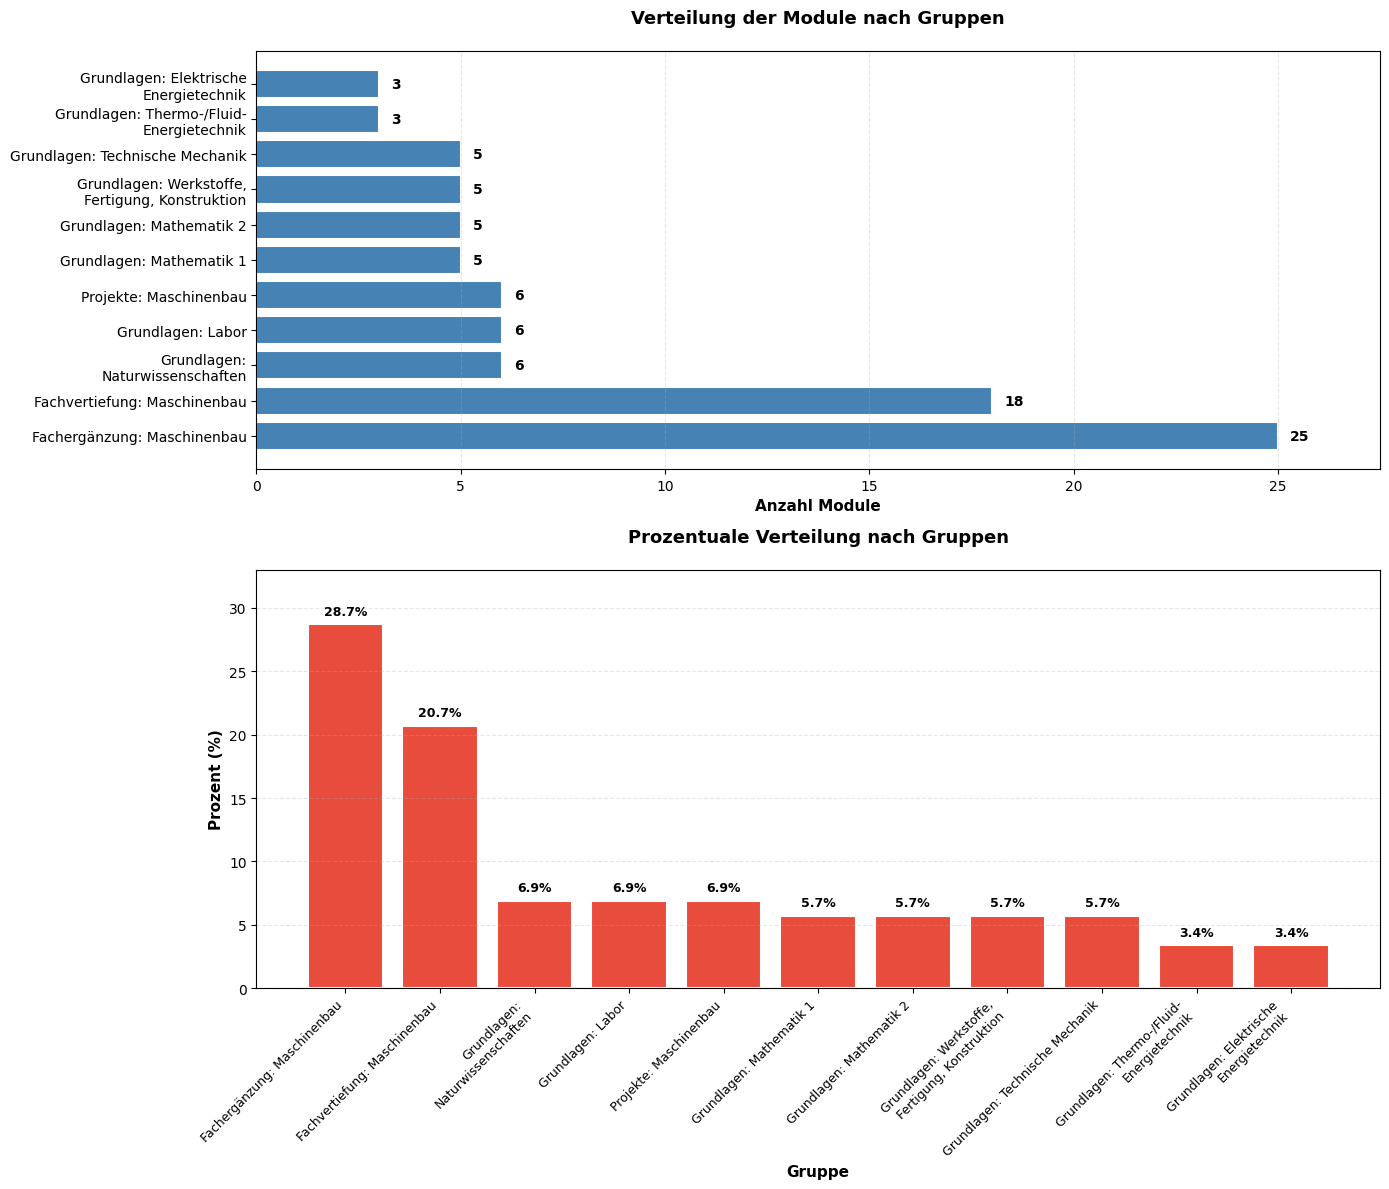

In [41]:
# Verteilung nach Gruppen
print("=" * 60)
print("VERTEILUNG NACH GRUPPEN")
print("=" * 60)
gruppen_verteilung = nodes['Gruppe'].value_counts()
print(gruppen_verteilung)
print(f"\nAnzahl verschiedener Gruppen: {len(gruppen_verteilung)}")
print(f"Module ohne Gruppenangabe: {nodes['Gruppe'].isnull().sum()}")

# Visualisierung
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Horizontales Balkendiagramm (oben)
ax = axes[0]
bars_h = ax.barh(range(len(gruppen_verteilung)), gruppen_verteilung.values, 
                 color='steelblue', edgecolor='white', linewidth=1.5)
ax.set_yticks(range(len(gruppen_verteilung)))
ax.set_yticklabels(gruppen_verteilung.index)
ax.set_xlabel('Anzahl Module', fontsize=11, fontweight='bold')
ax.set_title('Verteilung der Module nach Gruppen', fontsize=13, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x', linestyle='--')
ax.set_xlim(0, max(gruppen_verteilung.values) * 1.1)
# Werte auf Balken
for i, (bar, val) in enumerate(zip(bars_h, gruppen_verteilung.values)):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{val}', ha='left', va='center', fontsize=10, fontweight='bold')

# Vertikales Balkendiagramm mit Prozentangaben (unten)
ax = axes[1]
gruppen_verteilung_pct = (gruppen_verteilung / gruppen_verteilung.sum() * 100).round(1)
bars_v = ax.bar(range(len(gruppen_verteilung_pct)), gruppen_verteilung_pct.values, 
                color='#e74c3c', edgecolor='white', linewidth=1.5)
ax.set_xlabel('Gruppe', fontsize=11, fontweight='bold')
ax.set_ylabel('Prozent (%)', fontsize=11, fontweight='bold')
ax.set_title('Prozentuale Verteilung nach Gruppen', fontsize=13, fontweight='bold', pad=20)
ax.set_xticks(range(len(gruppen_verteilung_pct)))
ax.set_xticklabels(gruppen_verteilung_pct.index, rotation=45, ha='right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim(0, max(gruppen_verteilung_pct.values) * 1.15)
# Prozentangaben auf Balken
for i, (bar, val) in enumerate(zip(bars_v, gruppen_verteilung_pct.values)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{val}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Interpretation der Gruppenverteilung

**Hauptgruppen:**
- **Fachergänzung: Maschinenbau (25 Module, 28.7%)** dominiert das Curriculum als grösste Gruppe
- **Fachvertiefung: Maschinenbau (18 Module, 20.7%)** bildet die zweitgrösste Gruppe
- **Projekte: Maschinenbau (6 Module, 6.9%)** bildet eine kleinere, aber wichtige Gruppe

**Grundlagengruppen:**
- Relativ gleichmässig verteilt mit 3-6 Modulen pro Gruppe
- **Grundlagen: Naturwissenschaften** und **Grundlagen: Labor** haben je 6 Module (6.7%)
- Technische Mechanik, Werkstoffe/Fertigung/Konstruktion und Mathematik 2 haben je 5 Module (5.6%)

**Fazit:** Das Curriculum ist stark auf Fachergänzung und Fachvertiefung fokussiert (zusammen 49.4% aller Module), mit soliden Grundlagen in verschiedenen Bereichen. Die Projektmodule machen etwa 6.9% aus, was eine gute Balance zwischen Theorie und Praxis zeigt.


## 4. Verteilung nach Semester


VERTEILUNG NACH SEMESTER
Module mit Semesterangabe: 87
Module ohne Semesterangabe: 0

Statistische Beschreibung (nach Aufteilung mehrerer Semester):
count     96
unique     6
top        5
freq      33
dtype: object

Semester-Verteilung (nach Aufteilung):
1     8
2    10
3    17
4    13
5    33
6    15
Name: count, dtype: int64


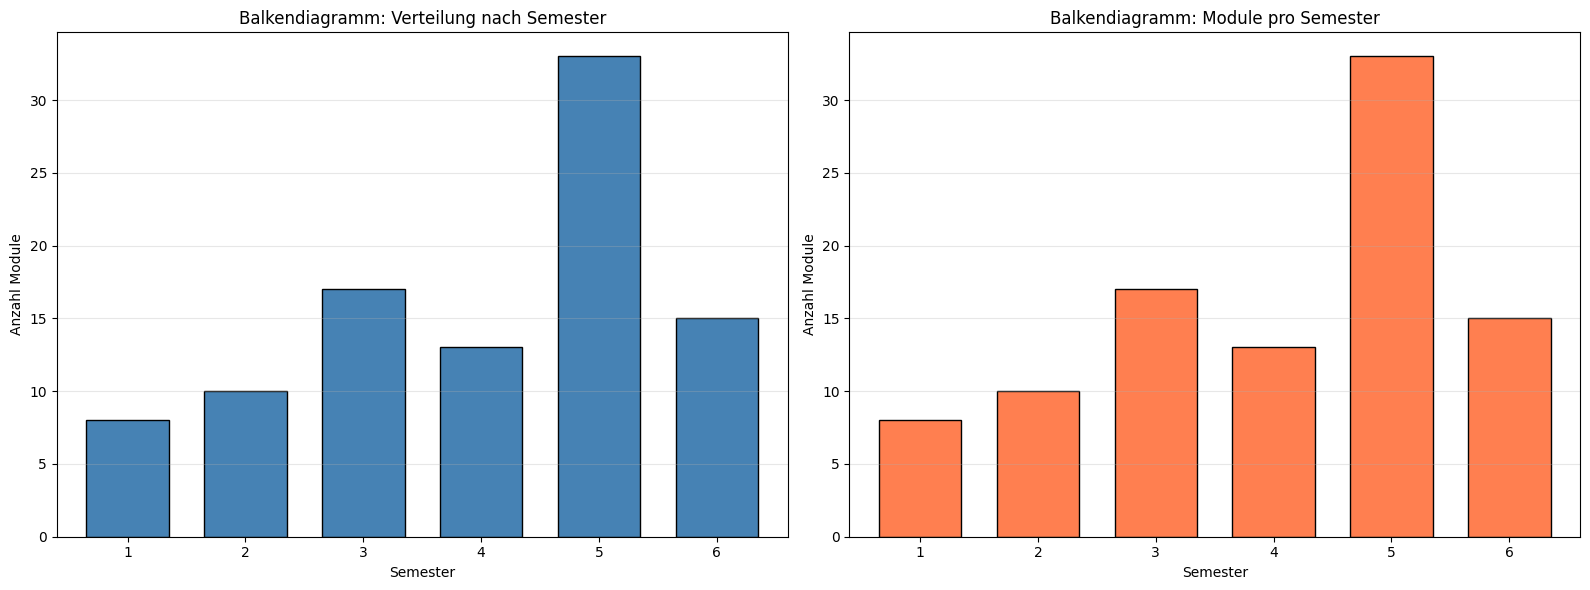

In [46]:
# Semester-Verteilung
print("=" * 60)
print("VERTEILUNG NACH SEMESTER")
print("=" * 60)
semester_clean = nodes['Semester'].dropna()
print(f"Module mit Semesterangabe: {len(semester_clean)}")
print(f"Module ohne Semesterangabe: {nodes['Semester'].isnull().sum()}")

if len(semester_clean) > 0:
    # Teile Module mit mehreren Semestern auf
    semester_expanded = []
    for semester in semester_clean:
        if ';' in str(semester):
            # Mehrere Semester: Teile auf
            semester_list = [s.strip() for s in str(semester).split(';')]
            semester_expanded.extend(semester_list)
        else:
            # Einzelnes Semester
            semester_expanded.append(str(semester))
    
    semester_expanded_series = pd.Series(semester_expanded)
    
    print(f"\nStatistische Beschreibung (nach Aufteilung mehrerer Semester):")
    print(semester_expanded_series.describe())
    print(f"\nSemester-Verteilung (nach Aufteilung):")
    semester_counts = semester_expanded_series.value_counts().sort_index()
    print(semester_counts)
    
    # Visualisierung
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Balkendiagramm (für diskrete Semesterwerte besser als Histogramm)
    ax = axes[0]
    semester_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black', width=0.7)
    ax.set_xlabel('Semester')
    ax.set_ylabel('Anzahl Module')
    ax.set_title('Balkendiagramm: Verteilung nach Semester')
    ax.grid(True, alpha=0.3, axis='y')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
    
    # Balkendiagramm
    ax = axes[1]
    semester_counts.plot(kind='bar', ax=ax, color='coral', edgecolor='black', width=0.7)
    ax.set_xlabel('Semester')
    ax.set_ylabel('Anzahl Module')
    ax.set_title('Balkendiagramm: Module pro Semester')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("Keine Semesterangaben verfügbar")


### Interpretation der Semester-Verteilung

**Datenverfügbarkeit:**
- Alle 87 Module (100%) haben eine Semesterangabe

**Verteilung (nach Aufteilung mehrerer Semester):**
- Module mit mehreren Semestern (z.B. "3;5") werden in allen relevanten Semestern gezählt, da sie flexibel belegbar sind
- **Semester 5** hat die meisten Module - Übergang zum Hauptstudium
- **Semester 6** hat ebenfalls viele Module - typisches Hauptstudium-Semester
- **Semester 1, 2, 3, 4** haben Module über die ersten Studienjahre - Grundlagenmodule
- Durch die Aufteilung von Modulen mit mehreren Semestern ergeben sich mehr Einträge als die Anzahl der Module

**Fazit:** Die Verteilung zeigt eine typische Studienstruktur mit Schwerpunkt im Hauptstudium (Semester 5-6). Die höchste Konzentration auf Semester 5 deutet darauf hin, dass dies der Übergang zum Hauptstudium und der Fokus auf Fachvertiefung ist. Module mit mehreren Semestern werden in allen relevanten Semestern gezählt, was die Flexibilität der Belegung widerspiegelt.


## 5. Semester vs. Gruppen


KREUZTABELLE: SEMESTER vs. GRUPPEN
Semester                                          1   2   3   4   5   6  All
Gruppe                                                                      
Fachergänzung: Maschinenbau                       0   0   7   0  17   8   32
Fachvertiefung: Maschinenbau                      0   0   0   0  12   6   18
Grundlagen:\nNaturwissenschaften                  2   2   1   1   0   0    6
Grundlagen: Elektrische\nEnergietechnik           0   0   1   1   1   0    3
Grundlagen: Labor                                 0   1   1   4   0   0    6
Grundlagen: Mathematik 1                          2   1   1   0   2   0    6
Grundlagen: Mathematik 2                          1   1   1   2   0   0    5
Grundlagen: Technische Mechanik                   0   1   2   2   0   0    5
Grundlagen: Thermo-/Fluid-\nEnergietechnik        0   1   1   1   0   0    3
Grundlagen: Werkstoffe,\nFertigung, Konstruktion  2   2   1   1   0   0    6
Projekte: Maschinenbau                   

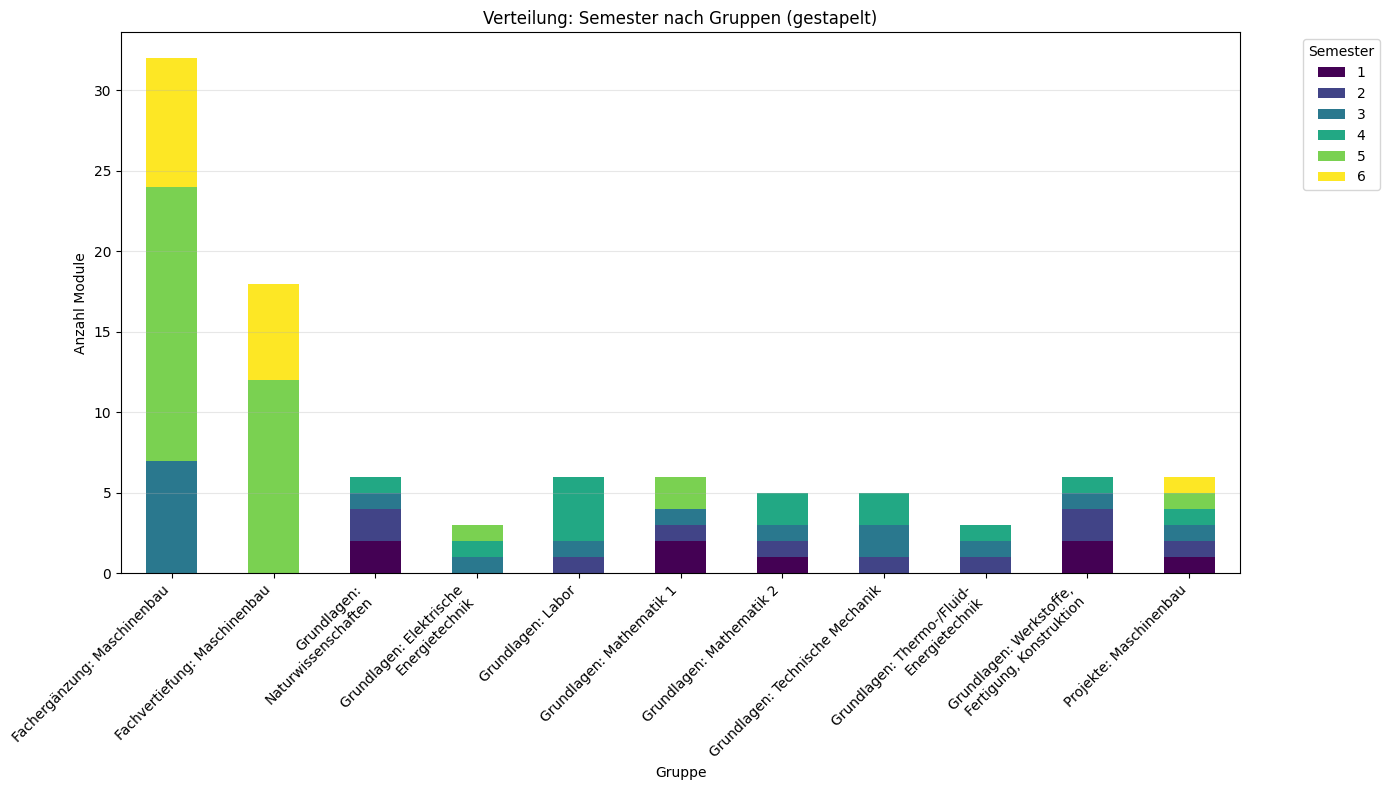

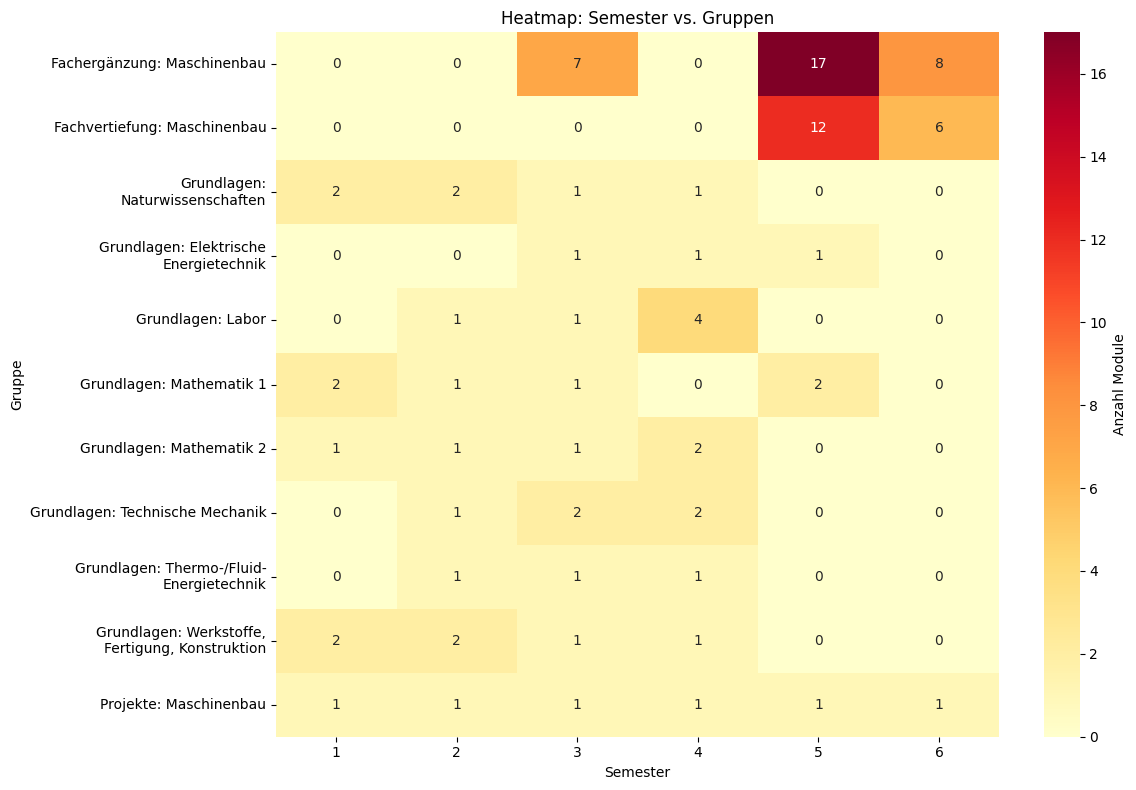

In [48]:
# Kreuztabelle Semester vs. Gruppen
print("=" * 60)
print("KREUZTABELLE: SEMESTER vs. GRUPPEN")
print("=" * 60)

# Teile Module mit mehreren Semestern auf (z.B. "3;5" -> 3 und 5)
nodes_expanded = []
for idx, row in nodes.iterrows():
    gruppe = row['Gruppe']
    semester = str(row['Semester']).strip()
    
    if pd.notna(semester) and semester not in ['nan', 'None', '']:
        # Prüfe, ob mehrere Semester durch Semikolon getrennt sind
        if ';' in semester:
            semester_list = [s.strip() for s in semester.split(';')]
        else:
            semester_list = [semester]
        
        # Erstelle für jedes Semester einen Eintrag
        for sem in semester_list:
            nodes_expanded.append({
                'Gruppe': gruppe,
                'Semester': sem
            })
    else:
        # Module ohne Semesterangabe
        nodes_expanded.append({
            'Gruppe': gruppe,
            'Semester': semester
        })

nodes_expanded_df = pd.DataFrame(nodes_expanded)

# Erstelle Kreuztabelle mit aufgeteilten Semestern
crosstab = pd.crosstab(nodes_expanded_df['Gruppe'], nodes_expanded_df['Semester'], margins=True)
print(crosstab)

# Visualisierung
fig, ax = plt.subplots(figsize=(14, 8))
crosstab_plot = pd.crosstab(nodes_expanded_df['Gruppe'], nodes_expanded_df['Semester'], margins=False)
crosstab_plot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Gruppe')
ax.set_ylabel('Anzahl Module')
ax.set_title('Verteilung: Semester nach Gruppen (gestapelt)')
ax.legend(title='Semester', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heatmap
fig, ax = plt.subplots(figsize=(12, 8))
crosstab_plot_heat = pd.crosstab(nodes_expanded_df['Gruppe'], nodes_expanded_df['Semester'], margins=False)
sns.heatmap(crosstab_plot_heat, annot=True, fmt='d', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Anzahl Module'})
ax.set_title('Heatmap: Semester vs. Gruppen')
ax.set_xlabel('Semester')
ax.set_ylabel('Gruppe')
plt.tight_layout()
plt.show()


### Interpretation der Kreuztabelle Semester vs. Gruppen

**Hinweis zur Aufteilung:** Module mit mehreren Semestern (z.B. "3;5") werden in allen relevanten Semestern gezählt, wodurch ein Modul in mehreren Semestern erscheinen kann.

**Hauptmuster:**
- **Semester 5** ist in vielen Gruppen stark vertreten - besonders in Fachvertiefung, Fachergänzung und Grundlagen
- **Semester 6** zeigt ebenfalls hohe Aktivität - typisches Hauptstudium-Semester mit Fachvertiefung und Fachergänzung
- **Semester 1-4** verteilen sich über verschiedene Grundlagengruppen - breite Grundlage in den ersten Studienjahren

**Gruppenspezifische Muster:**
- **Grundlagen: Mathematik 1** hat Module in verschiedenen Semestern - Grundlagenmodule über verschiedene Semester
- **Grundlagen: Naturwissenschaften** verteilt über Semester 1-4 - verschiedene Schwierigkeitsgrade
- **Fachvertiefung** und **Fachergänzung** dominieren Semester 5-6 - Hauptstudium-Fokus
- **Projekte: Maschinenbau** hat Module über alle Semester 1-6 - Projekte begleiten das gesamte Studium
- **Fachergänzung** hat Module, die in mehreren Semestern (z.B. "3;5") belegbar sind - Flexibilität in der Belegung

**Fazit:** Die Heatmap zeigt eine klare Struktur: Grundlagenmodule sind über die ersten Semester (1-4) verteilt, während Fachvertiefungs- und Fachergänzungsmodule stark auf Semester 5-6 konzentriert sind. Dies entspricht einer typischen Studienstruktur mit breiter Grundlage in den ersten Studienjahren und späterer Spezialisierung im Hauptstudium. Die Aufteilung von Modulen mit mehreren Semestern zeigt die Flexibilität der Belegung auf.
